# Session 5, Statistical diagnostics of the regression, Hypothesis Testing and Confidence Intervals (CI)

# 1. Probabilistic approach to the linear regression

When fitting a linear model one should admit that the model's accuracy is not absolute: 
$$
y=w_1 x + w_0 +\varepsilon,\hspace{5ex} (1)
$$
where $\varepsilon$ is the model's error (often called noise or residual) or 
$$
y=w^T x +\varepsilon,\hspace{5ex} (2)
$$
for the multivariate case with $x$ being an $n$-dimentional vector.

Uncertainty of the model (1) prediction can be expressed by considering $\varepsilon$ as a random variable representing deviations of the actual values of $y$ from the estimates provided by the precise linear model. A basic assumption is to have $\varepsilon\sim{\cal N}(0,\sigma^2)$ (mean is zero as otherwise the intercept term $w_0$ could be corrected accordingly). 

Often observations $y_i,x_i$ are spread in time ($i$ - could be time of the observation). 
Classical regression assumptions (Gauss-Markov): $\sigma$ is the same for all observations (does not depend on time) and errors $\varepsilon_i$ following ${\cal N}(0,\sigma^2)$ are mutually uncorrelated, i.e. $cov(\epsilon_i,\epsilon_j)=0$ for $i\neq j$. 

An alternative way of representing this linear model is by considering $y$ as a random variable and expressing it's conditional probability density function with respect to given $x$ and $w$ as
$$
p(y|x,w)={\cal N}(y|w_1 x+w_0,\sigma^2).\hspace{5ex} (3)
$$

This way it is actually the mean of the distribution (3) which is predicted by a linear model.
Now the problem is to fit unknown parameters of the model $w_1,w_0,\sigma$ (the last one $\sigma$ represents how usually close are the values of $y$ to the linear prediction), so that the model is the most consistent with the training data $\{(x_j,y_j), j=1..N\}$.

Fitting could be done through maximizing the likelihood that the observed data $y_j$ actually follows the suggested distribution (3). Likelihood is defined as a product of probability density values $\prod\limits_j p(y_j|x_j)$. But it's actually more practical to maximize the log-likelihood (which is equivalent):
$$
\log\left(\prod\limits_j p(y_j|x_j)\right)=\sum\limits_j \log\left({\cal N}(y|w_1 x+w_0,\sigma^2)\right)=
$$$$
=-\sum\limits_j \frac{(y_j-w_1 x_j+w_0)^2}{2\sigma^2}- N \log(\sigma)-N \log(\sqrt{2\pi})\to\max
$$
Optimization with respect to $w$ turns out to be equivalent to the above least-square minimization. Then for minimal $RSS(\hat{w})$ acheived, $\sigma$ could be found from
$$
\frac{RSS(\hat{w})}{2\sigma^2}+N\log(\sigma)\to\min
$$$$
\frac{\partial\frac{RSS(\hat{w})}{2\sigma^2}+N\log(\sigma)}{\partial \sigma}=0,
$$$$
-\frac{RSS(\hat{w})}{\sigma^3}+\frac{N}{\sigma}=0,
$$$$
\sigma^2=\frac{RSS(\hat{w})}{N}.
$$
However often in order to account for the actual number of degrees of freedom in the model which is $N-2$ rather than $N$, the adjusted version of the above estimate is being used:
$$
\sigma^2=\frac{RSS(\hat{w})}{N-2}
$$

In case of the multi-variate regression the probabilistic view on the model in the assumption that $\varepsilon\sim {\cal N}(0,\sigma^2)$ is
$$
p(y|x,w,\sigma)={\cal N}(y|w^T x,\sigma^2)\hspace{5ex} (4).
$$

Given a training set $X=\{(x_j^i), j=1...n, i=1...N\}$, $Y=\{(y^i), i=1...N\}$ (further also denote columns of $X$ as $X_j=\{(x_j^i), i=1...N\}$), the max-likelihood criteria will take form:
$$
\prod\limits_i p(y^i|x^i,w,\sigma)\to \max.
$$
or
$$
\log\left(\prod\limits_i p(y^i|x^i,w,\sigma)\right)=\sum\limits_i \log\left({\cal N}(y^i|w^T x^i,\sigma^2)\right)=
$$$$
=-\sum\limits_i \frac{(y^i-w^T x^i)^2}{2\sigma^2}- N \log(\sigma)-N \log(\sqrt{2\pi})=-\frac{RSS(w)}{2\sigma^2}-N \log(\sigma)-N \to\max
$$
Which is in turn equivalent to
$$
RSS(w)\to \min,
$$
i.e. least-square criteria plus (just like in case of the bi-variate regression)
$$
\frac{RSS(\hat{w})}{2\sigma^2}+N\log(\sigma)\to\min,
$$
i.e. the estimate $\hat{\sigma}$ could be found as
$$
\frac{\partial\left[\frac{RSS(\hat{w})}{2\sigma^2}+N\log(\hat{\sigma})\right]}{\partial \hat{\sigma}}=0,
$$$$
-\frac{RSS(\hat{w})}{\hat{\sigma}^3}+\frac{N}{\hat{\sigma}}=0,
$$$$
\hat{\sigma}^2=\frac{RSS(\hat{w})}{N}. \hspace{5ex} (5)
$$

Also an unbiased adjusted estimate is known to be
$$
\hat{\sigma}^2=\frac{RSS(\hat{w})}{N-n}. \hspace{5ex} (5')
$$



# 2. Explanations of regression statistics

### R-squared

The quality of fit of the linear regression is often expressed by
$$
R^2=1-\frac{RSS}{\sum_i (y_i-\bar{y})^2}=\frac{\sum_i (\hat{y}_i-\bar{y})^2}{\sum_i (y_i-\bar{y})^2},
$$
where $\overline{y}=\sum\limits_i y_i$ is the sample mean of observed values of responce variable. This way $R^2$ is often interpreted as a fraction of responce variable's variance explained by linear model. $R^2=1$ is equivalent to $RSS=0$, i.e. the model fits the observations exactly, i.e. responce variable depends linearly on the explaining variables. On the other hand, $R^2=0$ means that the model always predicts the sample mean $\overline{y}$, i.e. explaining variables $x$ have no effect on responce variable $y$. 

Least-square criteria is equivalent to maximizing $R^2$.

### Confidence intervals
As before uncertainty of the model predictions comes together with the uncertainty of the estimate for the model's coefficients estimates $w$. If we start from uncertainty of $y$ taking the observations for the output variable as normally distributed random variables, this leads to a multinomial normal distribution
$$
w\sim{\cal N}(\hat{w},\sigma^2(X^T X)^{-1})
$$
with an average $E[w]=\hat{w}$ and a variance-covariance matrix 
$$
Var(w)=\sigma^2(X^T X)^{-1}.
$$
However while using an estimate (5') for $\sigma=\hat{\sigma}=\sqrt{\frac{RSS(\hat{w})}{N-n}}$ we also have to admit its uncertainty rather than having $\sigma$ fixed which does not allow to consider a normal distribution for $w$ anymore. Instead one can have a Student's $t$-distributions with $N-n$ degrees of freedom for the standardized quantities
$$
z_j=\frac{w_j-\hat{w_j}}{\hat{\sigma} \sqrt{h_j}},
$$
where $h_j$ are the $j$-the diagonal elements of the matrix $(X^T X)^{-1}$.

This way the confidence intervals for each $\hat{w}_j$ given the confidence level $1-\alpha$ are constructred as
$$
P\left(w_j\in[\hat{w}_j-t_{\alpha/2}\sigma\sqrt{h_j},\hat{w}_j+t_{\alpha/2}\sigma\sqrt{h_j}]\right)=1-\alpha
$$
where $t_{\alpha/2}$ are quantiles of the $t$-distribution, i.e. such values that
$$
P(|z_j|\leq t_{\alpha/2})=1-\alpha
$$


### Hypothesis testing: P-values, t-statistics

Considering the statistical significance of each regressor $w_j$ we evaluate the hypothesis
$$
H_1:w_j\neq w_j^0
$$
vs a null-hypothesis
$$
H_0:w_j=w_j^0.
$$
When $w_j^0=0$ this means that we are trying to validate the statistical significance of the non-zero impact of the considered regressor $w_j$. For that purpose we consider a $t$-statistics
$$
t=\frac{w_j-w_j^0}{\hat{\sigma} \sqrt{h_j}}.
$$
If $|t|>t_{\alpha/2}$ this means that the hypothesis $H_0$ is too unlikely and should be rejected with the confidence level $1-\alpha$.

A $p$-value on the other hand is virtually speaking giving us such an $\alpha$ based on the observed $t$, i.e. expressed the probability
$$
P(|z|>|t|)
$$
of having a $z$ randomly produced by the distribution corresponding to the null-hypothesis value $w_j=w_j^0$ with even higher $|z|$ compared to the observed $|t|$. This can be interpreted as a likelihood that the observed value of $t$ is got just by chance given $w_j=w_j^0$. If this likelihood is lower than a certain threshold value (usually $5\%$) this is interpreted as having an equation $w_j=w_j^0$ too unlikely, i.e. having to reject the hypothesis $H_0$. Otherwise, if $p-value$ is higher than a threshold value ($>5\%$) this means that the null-hypothesis can not be rejected with sufficient confidence (of at least $95\%$) so this might be the case that the regressor does not have a significant impact. 

It is important to understand that $p$-value is not supposed to prove any specific estimate for the coefficient $w_j$ - it can only make us confident (or uncertain on the contrary) that $w_j\neq 0$ (or different from another value of interest). Also having a low $p$-values do not prove that the impact of $x_i$ on $y$ is actually linear. In turn, having high $p$-value by itself does not prove that $y$ is independent on $x_i$ (first of all - a linear impact could still be there despite being seen as unlikely, just disguised by noise; second - the actual impact could be non-linear, i.e. not subject to being described by a linear model; third - an impact of the considered regressor might be affected by an overlap with the impact of the other regressors, so it might not be impactful after others are considered, but it might still be impactful by itself.

Regressors having high $p$-values are usually not included into the final model in order to stay free from the random insignificnt effects, reducing the risk of overfitting. This is however not the only way of fighting it. Also sequentually excluding regressors based on their $p$-values is not necessarily the best way of the feature selection as high $p$-values might result from multicollinearity, i.e. from having an impact of the considered regressor overlap with the impact of others. And it might happen that excluding other regressors in the first place will better help with fighting the overfitting and also might lead to the decrease of the $p$-values of the remaining regressors as a result.

### Hypothesis testing: F-statistics

However often we need to test the significance of a subgroup of regressors together (or all of the regressors) testing the entire model against the null-hypothesis that a model based on a smaller subset of $m$ regressors (or just the intercept) of the regressors actually performs not worse than the original one.  The following $F$-statistics helps with that:
$$
F=\frac{(RSS_0-RSS_1)(N-n)}{RSS_1\cdot (n-m)},
$$
where $RSS_1$ is the optimal (least-square) $RSS$ value for the original regression and $RSS_0$ - is the optimal $RSS$ value of the regression based on the considered subset of $m$ regressors (testing the hypothesis that only those $m$ regressors are significant). If we only consider a cumulative impact of all the regressors vs a trivial regression having just the intercept, then $m-1$ and $F$-statitics could be expressed through $R^2$:
$$
F=\frac{R^2 (N-n)}{(1-R^2)(n-1)}.
$$
R and python will report the value of $F$ for the null-hypothesis that only the intercept is significant, as well as the $p$-value characterizing this $F$-statistics.

If $F$-statistics above is a critical value corresponding to a certain level of confidence $1-\alpha$ (or if the corresponding $p$-value is below the threshold $\alpha$ one rejects the null-hypothesis of having all the considered regressors together insignificant. Otherwise this hypothesis can not be rejected, so it might be the case that regressors do not really have an impact. But once again $F$-statistics can not prove any specific estimates for the coefficients, nor can it prove a linear impact of those regressors.




# 3. Feature selection

In case the statistical significance of the impact of the considered regressors is being questioned, or  multicollinearity or overfitting is observed, reducing complexity of the model (number of features or their dimensionality) is usually recommended. The most straighforward way of doing so is through feature selection. 

This can be done by selecting a subset of the regressors of the given size $k$ maximizing the model fit ($R^2$) over the validation sample. Two common ways of doing that are
- Step-backward: keep removing regressors (one by one) having the highest negative or lowest positive impact on the validation $R^2$, until a target number of features is reached or until validation $R^2$ can not be improved anymore;
- Step-forward: keep adding regressors (one by one) having the maximal positive impact or minimal negative impact on the validation $R^2$, until a target number of features is reached or until validation $R^2$ can not be improved anymore.

Those are not the only two ways - one can also consider more sophisticated heursitics for the selection of the best combination of the regressors. 

Drawback - by removing regressors we're discarding information from the feature space, while it could happen that both - noise as well as important information - are spread among all the regressors.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import statsmodels.formula.api as smf

from scipy.stats import t

Populating the interactive namespace from numpy and matplotlib


In [2]:
path = 'data/'
matplotlib.rcParams['figure.figsize'] = [10,4]

# Example 1
### Revisit univariate regression with housing price

In [3]:
data1 = pd.read_csv(path + 'Se3_Ex1.csv')
data1.head(3)

,zip_code,residential_units,land_sq_feet,gross_sq_feet,year_built,sale_price,sale_date
0,11204,4,2800,3600,1926,833000,2007-02-01
1,11204,2,4000,2492,1940,790000,2007-01-19
2,11204,3,3000,4086,1920,272766,2003-11-20


In [4]:
# Extract the "year" from "sale_date" and subtract "year_built" to obtain the "age"
# -- How old is that house when it was sold?
year_sale = lambda s:int(s[:4])

data1['age'] = data1.sale_date.apply(year_sale) - data1.year_built
data1.head(3)

,zip_code,residential_units,land_sq_feet,gross_sq_feet,year_built,sale_price,sale_date,age
0,11204,4,2800,3600,1926,833000,2007-02-01,81
1,11204,2,4000,2492,1940,790000,2007-01-19,67
2,11204,3,3000,4086,1920,272766,2003-11-20,83


In [5]:
data=data1
train = data[:300]
valid = data[300:400]
np.random.seed(100)
#from sklearn.model_selection import train_test_split
#train, valid = train_test_split(data1, test_size=0.7)

# An anonymous function that returns your regression model for future usage
Regress = lambda feature: smf.ols(formula = 'sale_price ~ %s'%feature, data = train).fit()

# For displaying R^2 and linear model summary
def modelEval(lm, key = 'sale_price'):
    lmy = lm.predict(valid)
    y_err = lmy - valid[key]
    y_norm = valid[key]-mean(valid[key])
    R2 = 1-y_err.dot(y_err)/y_norm.dot(y_norm)  # R2 w.r.t. validation set
    print('Validation R^2 is %f'%R2)
    print(lm.summary())
    plt.plot(lmy, lmy, 'b-')
    plt.plot(lmy, valid[key],'or')

Validation R^2 is 0.103450
                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     43.06
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           2.35e-10
Time:                        20:13:44   Log-Likelihood:                -4064.7
No. Observations:                 300   AIC:                             8133.
Df Residuals:                     298   BIC:                             8141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept      4.62

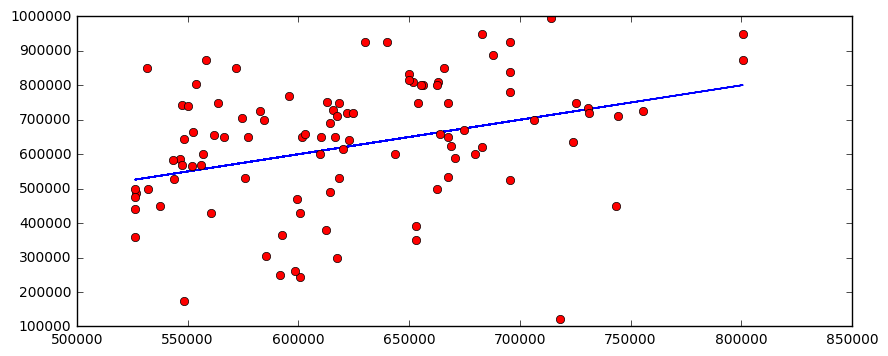

In [6]:
grossAreaRegModel = Regress('gross_sq_feet')
modelEval( grossAreaRegModel )

So the impact of the house size is statistically significant (p-value<$5\%$). The 95% confidence interval however is pretty broad. How does the 75%-confidence interval look like? 90%? 99%?

## t-distribution
### One-sided

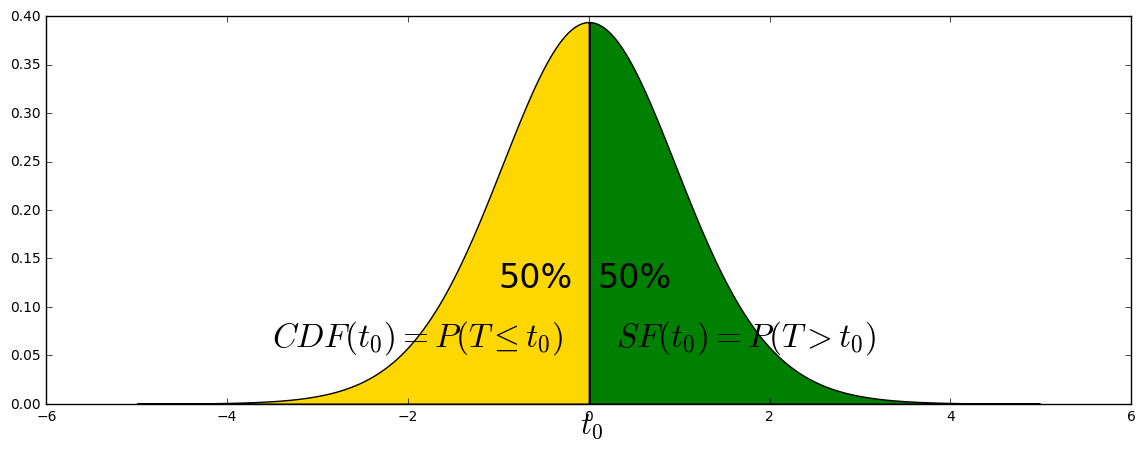

In [7]:
df = 20    # degree of freedom
x = np.arange(-5,5,0.01)
y = t.pdf(x, df)    # default setting with location parameter 0 and scale parameter 1
q = 0.5
t0 = t.isf(q, df)   # calculate the percentile/partition point (inverse survival function)
ax = plt.figure(figsize=(14,5)).add_subplot(111)

# For painting colored area
ax.fill_between(x[x<t0], 0, y[x<t0], facecolor = 'gold')
ax.fill_between(x[x>t0], 0, y[x>t0], facecolor = 'g')
# Annotations
ax.text(t0+0.3,0.06,'$SF(t_0) = P(T>t_0)$', fontsize = 24)
ax.text(t0-3.5,0.06,'$CDF(t_0) = P(T\leq t_0)$', fontsize = 24)
ax.text(t0-1, 0.12, '%.0f%%'%(100*(1-q)), fontsize = 24)
ax.text(t0+0.1,0.12, '%.0f%%'%(100*q), fontsize = 24)
ax.text(t0-0.1, -0.03, '$t_0$', fontsize = 22)
plt.show()

### Two-sided

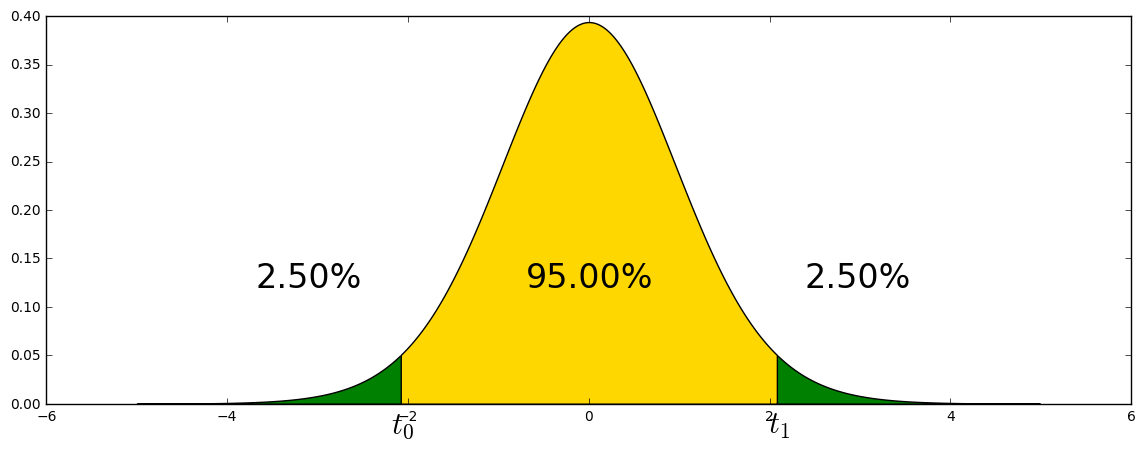

In [8]:
q = 0.05/2
t0 = t.ppf(q, df)   # lower bound
t1 = t.isf(q, df)   # upper bound, or simply "-t0" because of symmetry

ax = plt.figure(figsize=(14,5)).add_subplot(111)
ax.fill_between(x[(x<t0) | (x>t1)], 0, y[(x<t0) | (x>t1)], facecolor = 'green') # tails
ax.fill_between(x[(x>t0) & (x<t1)], 0, y[(x>t0) & (x<t1)], facecolor = 'gold')  # center
# Annotations
ax.text(t1+0.3, 0.12, '%.2f%%'%(100*q), fontsize = 24)
ax.text(t0-1.6, 0.12, '%.2f%%'%(100*q), fontsize = 24)
ax.text(-0.7, 0.12, '%.2f%%'%(100*(1-q*2)), fontsize = 24)
ax.text(t0-0.1, -0.03, '$t_0$', fontsize = 22)
ax.text(t1-0.1, -0.03, '$t_1$', fontsize = 22)
plt.show()

### Method 1, with t distribution, two-sided

For those who are interested:  
Given a univariate linear regression $y = w_0 + w_1x + \epsilon$, we have:
1. The Mean Square Error (MSE) is obtained by
$$MSE = \frac{\sum_{i=1}^n (\hat y_i - y_i)^2}{n-2}$$
where the residual can be found by calling **lm.resid** once you have the linear regression model **lm**, and the n−2 term accounts for the loss of 2 degrees of freedom in the estimation of the intercept and the slope.

2. Then the Standard Error (SE) of linear regression coefficient $w_1$ can be computed by
$$\hat{SE}(w_1) = \sqrt\frac{MSE}{\sum_{i=1}^n(x_i-\bar x)^2}$$
but you can always save yourself the trouble by calling **lm.bse**

In [9]:
x_err = train.gross_sq_feet - train.gross_sq_feet.mean()
sqrt(
    grossAreaRegModel.resid.dot(grossAreaRegModel.resid)/(70-2)  # MSE
    /(x_err.dot(x_err)))

19.991357151007723

In [10]:
grossAreaRegModel.bse

Intercept        26829.923760
gross_sq_feet        9.549675
dtype: float64

In [11]:
grossAreaRegModel.params

Intercept        462258.247868
gross_sq_feet        62.661552
dtype: float64

In [12]:
t.interval(0.95, grossAreaRegModel.df_resid,    # degree of freedom is stored in lm.df_resid
           loc = grossAreaRegModel.params['gross_sq_feet'], # fitted coefficient
           scale = grossAreaRegModel.bse['gross_sq_feet'])  # standard error

(43.868206246140005, 81.454897270846118)

In [13]:
t.interval(0.75, grossAreaRegModel.df_resid,    # degree of freedom is stored in lm.df_resid
           loc = grossAreaRegModel.params['gross_sq_feet'], # fitted coefficient
           scale = grossAreaRegModel.bse['gross_sq_feet'])  # standard error

(51.65463473761433, 73.668468779371793)

In [14]:
t.interval(0.9, grossAreaRegModel.df_resid,    # degree of freedom is stored in lm.df_resid
           loc = grossAreaRegModel.params['gross_sq_feet'], # fitted coefficient
           scale = grossAreaRegModel.bse['gross_sq_feet'])  # standard error

(46.904750195541695, 78.418353321444428)

In [15]:
t.interval(0.99, grossAreaRegModel.df_resid,    # degree of freedom is stored in lm.df_resid
           loc = grossAreaRegModel.params['gross_sq_feet'], # fitted coefficient
           scale = grossAreaRegModel.bse['gross_sq_feet'])  # standard error

(37.904708849959022, 87.418394667027101)

### Method 2, manually compute--what if we want to calculate one-sided CI?

In [16]:
# One-sided CI, p = 0.95 or q = 1-0.95
    # lower intervel, t.isf(q) or t.ppf(p), then your CI is (-inf, t.isf(q))
    # upper interval, t.ppf(q) or t.isf(p), then your CI is (t.ppf(q), inf)
    # don't forget your degree of freedom
# Two-sided CI, both side, then:
q = (1-0.9)/2
lowerBound = t.ppf(q, grossAreaRegModel.df_resid) * grossAreaRegModel.bse['gross_sq_feet']\
                                                  + grossAreaRegModel.params['gross_sq_feet']
upperBound = t.isf(q, grossAreaRegModel.df_resid) * grossAreaRegModel.bse['gross_sq_feet']\
                                                  + grossAreaRegModel.params['gross_sq_feet']
print('[%f,%f]'%(lowerBound,upperBound))

[46.904750,78.418353]


### Method 3, two-sided, use conf_int instance from statsmodel module

In [17]:
grossAreaRegModel.conf_int().ix[[-1]] # default setting alpha = 0.05, e.g. 95% CI

,0,1
gross_sq_feet,43.868206,81.454897


In [18]:
grossAreaRegModel.conf_int(alpha = 0.25).ix[[-1]] # 75% CI

,0,1
gross_sq_feet,51.654635,73.668469


In [19]:
grossAreaRegModel.conf_int(alpha = 0.1).ix[[-1]] # 90% CI

,0,1
gross_sq_feet,46.90475,78.418353


In [20]:
grossAreaRegModel.conf_int(alpha = 0.1).ix[[-1]] # 99% CI

,0,1
gross_sq_feet,46.90475,78.418353


In [21]:
# Q1. Regress the "sale_price" over the following ONE BY ONE in your training set:
    # "land_sq_feet"
    # "residential_units"
    # "age"

In [22]:
# Q2. Try to build a universal function so that for each univariate regression model, you can:
    # Observe your coefficients and p-values (obtained through training set)
    # Calculate the corr() matrix (with respect to all 100 entries)
    # Calculate the "Out-of-sample" R^2 based on your validation set
    # Plot the prediction versus observation (with respect to validation set)

In [23]:
# Q3. Experiment with your model, choose a feature and compute its 90% CI.

In [24]:
# Q4. Next we do it reversely, suppose you are given the "average price per square foot" p0
    # What is the probability that X (real avg. price per sq. foot) is higher/lower than p0?
    # Compute the probability of X > 50 and X < 0

In [25]:
# Q1. Regress the "sale_price" over the following ONE BY ONE in your training set:
    # "land_sq_feet"
    # "residential_units"
    # "year_gap"
# Q2. For each univariate regression model:
    # Observe your coefficients and p-values (obtained through training set)
    # Calculate the corr() matrix (with respect to all 100 entries)
    # Calculate the "Out-of-sample" R^2 based on your validation set
    # Plot the prediction versus observation (with respect to validation set)

Validation R^2 is 0.013977
                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     48.06
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           2.57e-11
Time:                        20:13:46   Log-Likelihood:                -4062.6
No. Observations:                 300   AIC:                             8129.
Df Residuals:                     298   BIC:                             8137.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept     3.449e+

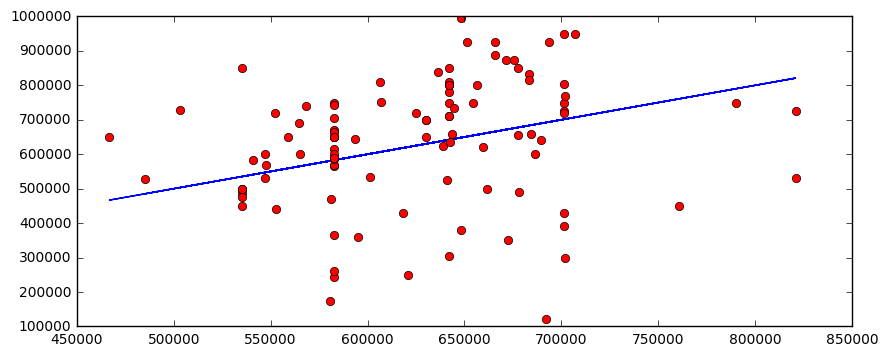

In [26]:
modelEval( Regress('land_sq_feet') )

In [27]:
data[['sale_price','land_sq_feet']].corr()

,sale_price,land_sq_feet
sale_price,1.000000,0.353516
land_sq_feet,0.353516,1.000000


Validation R^2 is 0.046821
                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     25.51
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           7.66e-07
Time:                        20:13:46   Log-Likelihood:                -4072.7
No. Observations:                 300   AIC:                             8149.
Df Residuals:                     298   BIC:                             8157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept  

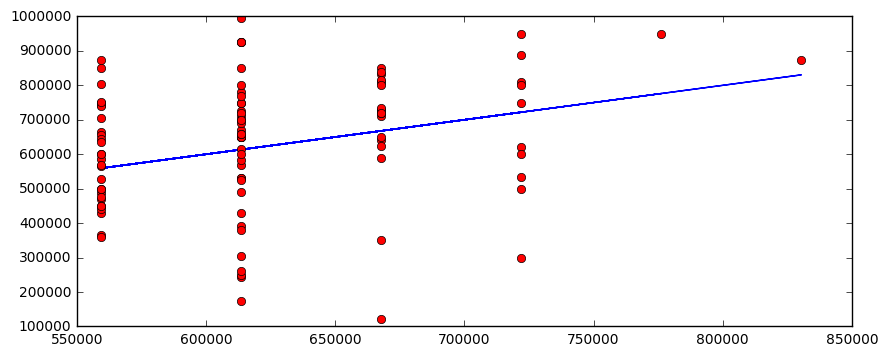

In [28]:
modelEval( Regress('residential_units') )

In [29]:
data[['sale_price','residential_units']].corr()

,sale_price,residential_units
sale_price,1.000000,0.292321
residential_units,0.292321,1.000000


Validation R^2 is -0.004945
                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.03747
Date:                Wed, 11 Oct 2017   Prob (F-statistic):              0.847
Time:                        20:13:46   Log-Likelihood:                -4085.0
No. Observations:                 300   AIC:                             8174.
Df Residuals:                     298   BIC:                             8181.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   6.322e+05   

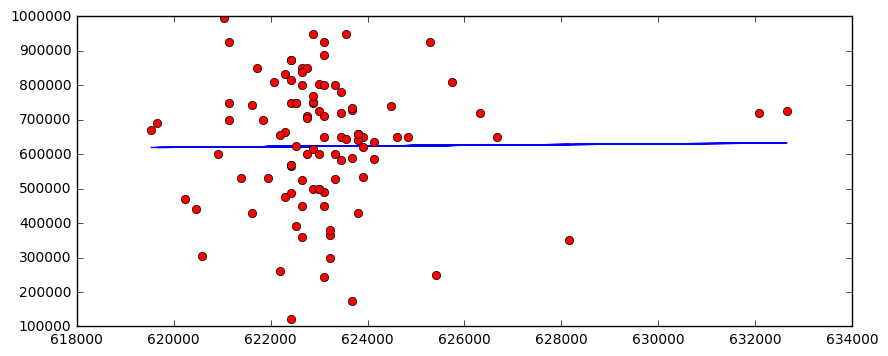

In [30]:
modelEval( Regress('age') )

In [31]:
data[['sale_price','age']].corr()

,sale_price,age
sale_price,1.000000,-0.042668
age,-0.042668,1.000000


### Overall correlation matrix

In [32]:
data.iloc[:,[1,2,3,5,7]].corr()

,residential_units,land_sq_feet,gross_sq_feet,sale_price,age
residential_units,1.000000,0.236942,0.549918,0.292321,-0.113217
land_sq_feet,0.236942,1.000000,0.408048,0.353516,-0.106954
gross_sq_feet,0.549918,0.408048,1.000000,0.331833,-0.358979
sale_price,0.292321,0.353516,0.331833,1.000000,-0.042668
age,-0.113217,-0.106954,-0.358979,-0.042668,1.000000


In [33]:
# Q4. Next we do it reversely, suppose you are given the "average price per square foot" p0
    # What is the probability that X (real avg. price per sq. foot) is higher/lower than p0?
    # Compute the probability of X > 50 and X < 0

In [34]:
# Higher than 50:
t.sf((50 - grossAreaRegModel.params['gross_sq_feet'])/grossAreaRegModel.bse['gross_sq_feet'],
     grossAreaRegModel.df_resid)

0.90704959575529209

In [35]:
# Lower than 0:
t.cdf((0 - grossAreaRegModel.params['gross_sq_feet'])/grossAreaRegModel.bse['gross_sq_feet'],
      grossAreaRegModel.df_resid)

1.1767708474895523e-10

In [36]:
# Compare with the p-value calculated from regression model
grossAreaRegModel.pvalues['gross_sq_feet']/2  # One-sided

1.1767708474895523e-10

# Example 2.
### Multivariate regression with housing price data

In [37]:
# Q1. Same dataset as Example 1, now regress the sale_price over the following ALTOGETHER
    # residential_units
    # land_sq_feet
    # gross_sq_feet
    # age

In [38]:
# Q2. How does our model look like?
    # Observe how p-values and confidence intervals changed compared to Example 1.

In [39]:
# Q3. Simply remove the features with high p-value then re-run the regression, what happens?
    # Observe how p-values and confidence intervals chang compared to Q2.

In [40]:
# Q1. Same dataset as Example 1, now regress the sale_price over the following ALTOGETHER
    # residential_units
    # land_sq_feet
    # gross_sq_feet
    # year_gap
# Try a) first 70 and b) first 300 as the training data 

## In this summary table we can see that the coefficients are implying:
* Avg. Base price
* Avg. Price per Sq.Foot (land)
* Ave. Price per Sq.Foot (gross)
* Avg. Additional Price per Residential Units
* Avg. Additional Price per Year Gap

Validation R^2 is 0.075092
                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     19.81
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           1.86e-14
Time:                        20:13:47   Log-Likelihood:                -4049.3
No. Observations:                 300   AIC:                             8109.
Df Residuals:                     295   BIC:                             8127.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept  

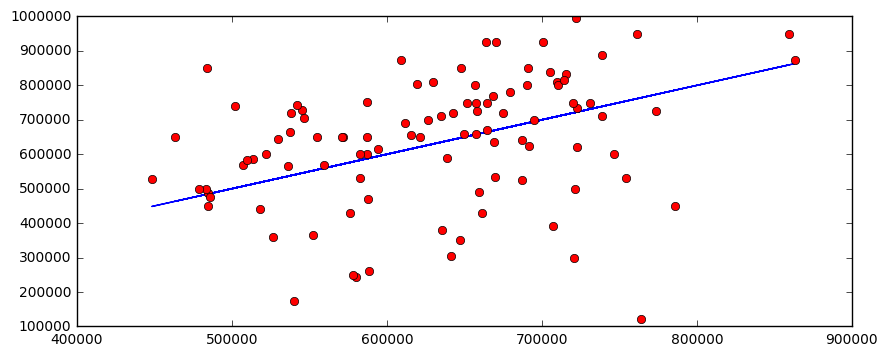

In [41]:
train = data[0:300]
valid = data[300:400]
modelEval( Regress('land_sq_feet + gross_sq_feet + residential_units + age') )

In [42]:
# Q2. How does our model look like?
    # Observe how p-values and confidence intervals change compared to Example 1.

In [43]:
# Q3. Simply remove the features with high p-value then re-run the regression, what happens?
    # Observe how p-values and confidence intervals change compared to Q2.

### Experiment 1, drop the "residential_units" alone

Validation R^2 is 0.082818
                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     25.29
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           1.35e-14
Time:                        20:13:47   Log-Likelihood:                -4050.8
No. Observations:                 300   AIC:                             8110.
Df Residuals:                     296   BIC:                             8124.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept      1.86

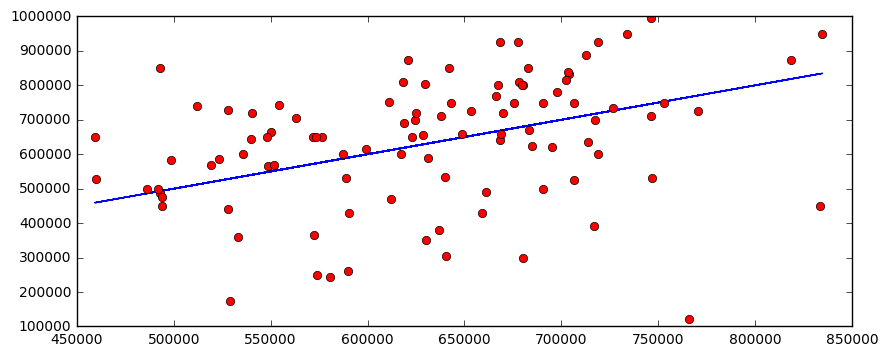

In [44]:
modelEval(Regress('land_sq_feet + gross_sq_feet + age'))

# Example 3
### An artificial example to demonstrate feature selection based on maximizing validation $R^2$, rather than p-values

The regular $R^2$:
$$
R^2=1-\frac{RSS}{\sum_i (y_i-\bar{y})^2}=\frac{\sum_i (\hat{y}_i-\bar{y})^2}{\sum_i (y_i-\bar{y})^2},
$$
The adjusted $R^2$:
$$
adj.R^2=1-\frac{RSS}{\sum_i (y_i-\bar{y})^2} \cdot \frac{N-1}{N-P-1} 
$$
where $N$ is the total sample size and $P$ is the number of features/selected variables

In [45]:
n = 15
np.random.seed(1418)

col = []
for i in range(n):
    col.append('x%d'%(i+1))

X = pd.DataFrame(np.random.randn(50*n).reshape(50,n))
Y = X.ix[:,:3].sum(axis = 1) + np.random.randn(50)
data3 = pd.concat((Y,X), axis = 1)  # concatenate Y and X
data3.columns = ['Y'] + col         # rename the columns

In [46]:
# The regression function based on the feature selection
def AdjR2(flag):
    '''
    Evalute the model with adjusted R-squared,
    with flag indicating the feature selection
    1--feature included
    0--feature excluded
    '''
    formstr='Y~-1'
    for i in range(len(flag)):
        if flag[i]==1:
            formstr += '+x%d'%(i+1) # Construct the regression formula based on flag
    train = data3[:20]
    valid = data3[20:]
    lm = smf.ols(formula = formstr, data = train).fit()
    lmy = lm.predict(valid)
    y_err = lmy-valid.Y
    y_norm = valid.Y-mean(valid.Y)
    # Adjusted R^2
    R2 = 1 - y_err.dot(y_err) / y_norm.dot(y_norm) * (n-1) / (n-sum(flag)-1)
    return R2, lm

### Revisit the overfitting:

In [47]:
adjR2 = []
regR2 = []
for i in range(1, n):
    a,b = AdjR2([1]*i + [0]*(n-i))
    adjR2.append(a)
    regR2.append(b.rsquared)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: divide by zero encountered in double_scalars


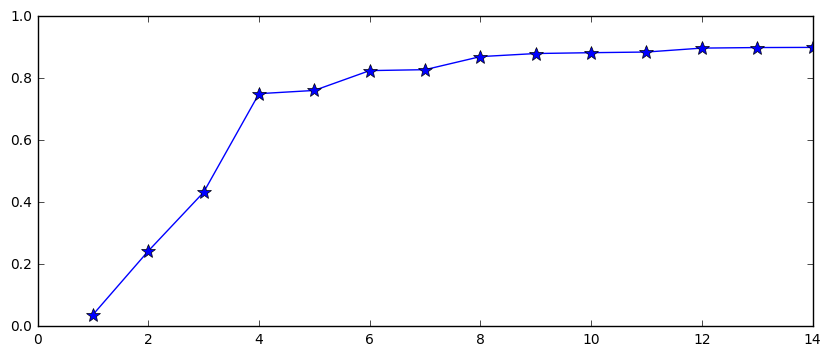

In [48]:
# In sample R2
plt.plot(range(1, n), regR2, 'b-*', markersize = 10)

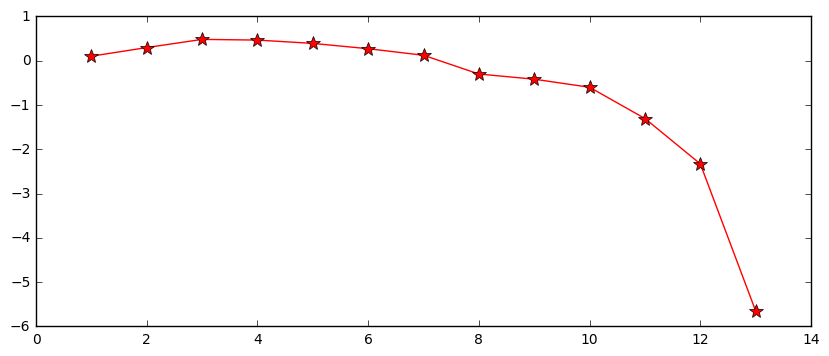

In [49]:
# Out of sample R2 (adjusted)
plt.plot(range(1, n), adjR2, 'r-*', markersize = 10)

In [50]:
# Feature selection based on the p-values
def DropP(threshold = 1):
    '''Drop all features with p-values higher than the threshold'''
    flag_p = (AdjR2([1]*n)[1]).pvalues < threshold
    print('Validation R^2 is %f'%AdjR2(flag_p)[0])
    print(AdjR2(flag_p)[1].summary())

### First of all, let's try to include all features and observe their p-values
Note that if we include them all, we have a nagative one (N-N-1) in the denominator (since N = K), 
$$
adj.R^2=1-\frac{RSS}{\sum_i (y_i-\bar{y})^2} \cdot \frac{N-1}{N-K-1} 
$$
which simply flips the sign of the second term of the right hand side, making the adjusted $R^2$ ridiculously high

In [51]:
DropP(1)

Validation R^2 is 13.610534
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     4.896
Date:                Wed, 11 Oct 2017   Prob (F-statistic):             0.0444
Time:                        20:13:49   Log-Likelihood:                -13.143
No. Observations:                  20   AIC:                             56.29
Df Residuals:                       5   BIC:                             71.22
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.8509   

### If we remove variables based on their p-value (if > 0.05), then we'll keep $x_3,x_4$, and the model's out of sample $R^2$ is negative!

In [52]:
DropP(0.05)

Validation R^2 is -0.074452
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     11.97
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           0.000493
Time:                        20:13:49   Log-Likelihood:                -32.211
No. Observations:                  20   AIC:                             68.42
Df Residuals:                      18   BIC:                             70.41
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x3             0.6376   

### Next we try to select feature in a fashion that maximizing validation adjusted $R^2$

In [53]:
# Find the best feature selection (forward step-wise) that maximizes the out-of-sample adjusted R2
def FindBestI():
    flag = np.zeros(n)    # initially exclude all regressors: 1-include, 0-exclude
    r2max = 0             # for storing and compare with best R^2
    while True:
        flag_mat = np.maximum(np.eye(n),flag) #create the matrix with rows representing the cases of adding each new feature
        # see if R2 increases if we add one more feature
        r2 = np.apply_along_axis(AdjR2,1,flag_mat)[:,0]  # 1: row-wise operation producing the validation R2 for each row (combination of features)
        temp = r2.max() #take the best R2
        if temp > r2max:
            r2max = temp
            flag = flag_mat[r2.argmax()]  # select the feature set that improved R2
        else:
            break                         # if there's nothing to add, break the loop
    return flag

flag = FindBestI()             # store the best choice of feature selection
r2_best,lm_best = AdjR2(flag)  # then run the regression based on such selection
ix = [col[i] for i in range(n) if flag[i]==1]

b = pd.DataFrame({'Pvalues':AdjR2([1]*n)[1].pvalues, 'Keeper':col})
c = 'forestgreen'
def highlight_pval(val):
    color = c if val in ix else 'white'
    return 'background-color: %s'%color

b.style.applymap(highlight_pval, subset=['Keeper']).\
    bar(subset = ['Pvalues'], color=c)

### The length of green bar in right column indicates the p-value, and we can see that despite having high p-value,  $x_1$ is still included in our "best fit", which accurately reflects our true model that $y \sim x_1 + x_2 + x_3$

In [54]:
print('Validation R^2 is %f'%r2_best)
print(lm_best.summary())

Validation R^2 is 0.481907
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     4.324
Date:                Wed, 11 Oct 2017   Prob (F-statistic):             0.0194
Time:                        20:13:50   Log-Likelihood:                -35.002
No. Observations:                  20   AIC:                             76.00
Df Residuals:                      17   BIC:                             78.99
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.7465    

And that's how we produced lecture example

In [55]:
smf.ols(formula = 'sale_price ~ gross_sq_feet', data = data1.ix[15:70]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     14.69
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           0.000332
Time:                        20:13:50   Log-Likelihood:                -755.55
No. Observations:                  56   AIC:                             1515.
Df Residuals:                      54   BIC:                             1519.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept      3.545e+05   7.76e+04      4.566      0.000      1.99e+05   5.1e+05
gross_sq_feet   112.8024     29.428      3.833      0.000        53.802   171.803
==============================================================================
Omnibus:                        1.147   Durbin-Watson:                   2.525
Prob(Omnibus):                  0.564   Jarque-Bera (JB):                0.625
Skew:                          -0.242   Prob(JB):                        0.732
Kurtosis:                       3.186   Cond. No.                     8.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
smf.ols(formula = 'sale_price ~ residential_units', data = data1.ix[15:70]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     4.876
Date:                Wed, 11 Oct 2017   Prob (F-statistic):             0.0315
Time:                        20:13:50   Log-Likelihood:                -759.87
No. Observations:                  56   AIC:                             1524.
Df Residuals:                      54   BIC:                             1528.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept          5.126e+05   6.22e+04      8.237      0.000      3.88e+05  6.37e+05
residential_units   5.56e+04   2.52e+04      2.208      0.031      5119.038  1.06e+05
==============================================================================
Omnibus:                        0.798   Durbin-Watson:                   2.374
Prob(Omnibus):                  0.671   Jarque-Bera (JB):                0.344
Skew:                          -0.172   Prob(JB):                        0.842
Kurtosis:                       3.171   Cond. No.                         6.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
smf.ols(formula = 'sale_price ~ gross_sq_feet + residential_units', data = data1.ix[15:70]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     7.461
Date:                Wed, 11 Oct 2017   Prob (F-statistic):            0.00140
Time:                        20:13:50   Log-Likelihood:                -755.34
No. Observations:                  56   AIC:                             1517.
Df Residuals:                      53   BIC:                             1523.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept          3.528e+05   7.81e+04      4.517      0.000      1.96e+05  5.09e+05
gross_sq_feet       132.8740     43.580      3.049      0.004        45.465   220.283
residential_units -2.166e+04   3.45e+04     -0.627      0.533     -9.09e+04  4.76e+04
==============================================================================
Omnibus:                        0.775   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.679   Jarque-Bera (JB):                0.471
Skew:                          -0.224   Prob(JB):                        0.790
Kurtosis:                       3.034   Cond. No.                     8.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""